# Melbourne Housing Market

## CONTEXT
The objective of this project is to apply exploratory analysis and regression techniques to identify which features affect home prices the most in the Melbourne Housing Market.

## DATA PRE-PROCESSING

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import sqrt, abs, round
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline


### Reading a pdf fileuse pypdf library



In [3]:
df=pd.read_csv("C:/Users/91728/Downloads/melbourne.csv")
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
23542,Wyndham Vale,25 Clitheroe Dr,3,u,NaN,PN,Harcourts,26-08-2017,27.2,3024.0,...,1.0,0.0,552.0,119.0,1990.0,NaN,-37.90032,144.61839,Western Metropolitan,5262.0
23543,Wyndham Vale,19 Dalrymple Bvd,4,h,NaN,S,hockingstuart,26-08-2017,27.2,3024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-37.87882,144.60184,Western Metropolitan,5262.0
23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26-08-2017,12.7,3085.0,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26-08-2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0
23546,Yarraville,33 Freeman St,4,h,1050000.0,VB,Village,26-08-2017,6.3,3013.0,...,2.0,2.0,NaN,139.0,1950.0,NaN,-37.81829,144.87404,Western Metropolitan,6543.0


In [4]:
df.shape

(23547, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23547 entries, 0 to 23546
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         23547 non-null  object 
 1   Address        23547 non-null  object 
 2   Rooms          23547 non-null  int64  
 3   Type           23547 non-null  object 
 4   Price          18396 non-null  float64
 5   Method         23547 non-null  object 
 6   SellerG        23547 non-null  object 
 7   Date           23547 non-null  object 
 8   Distance       23546 non-null  float64
 9   Postcode       23546 non-null  float64
 10  Bedroom2       19066 non-null  float64
 11  Bathroom       19063 non-null  float64
 12  Car            18921 non-null  float64
 13  Landsize       17410 non-null  float64
 14  BuildingArea   10018 non-null  float64
 15  YearBuilt      11540 non-null  float64
 16  CouncilArea    15656 non-null  object 
 17  Lattitude      19243 non-null  float64
 18  Longti

# VARIABLE TYPES

# ****Categorical Variables****

Based on the information below, the following variables: 'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname' will need to be specified as categories rather than general objects.
In addition, the Date variable will need to be converted to a date object.

___Identifying object column___

In [6]:
df.select_dtypes(['object']).columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

# ***Convert objects to categorical variables***

In [7]:
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for colname in obj_cats:
    df[colname] = df[colname].astype('category')

In [8]:
#converting to date objects
df['Date']=pd.to_datetime(df['Date'])

# ****Numerical Variables****

A statistical summary of the numeric variables above indicates that Postcode is being treated as numeric when it should be identified as categorical. This feature will need to be converted to the correct data type.

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,23547.0,2.976048e+00,0.974501,1.00000,2.0000,3.0000,4.000000e+00,1.200000e+01
Price,18396.0,1.056697e+06,641921.666710,85000.00000,633000.0000,880000.0000,1.302000e+06,9.000000e+06
Distance,23546.0,1.030651e+01,6.016318,0.00000,6.2000,9.5000,1.300000e+01,4.810000e+01
Postcode,23546.0,3.109783e+03,94.522190,3000.00000,3047.0000,3101.0000,3.150000e+03,3.978000e+03
Bedroom2,19066.0,2.951956e+00,0.996032,0.00000,2.0000,3.0000,4.000000e+00,3.000000e+01
Bathroom,19063.0,1.570897e+00,0.712684,0.00000,1.0000,1.0000,2.000000e+00,1.200000e+01
Car,18921.0,1.626235e+00,0.974048,0.00000,1.0000,2.0000,2.000000e+00,2.600000e+01
Landsize,17410.0,5.517835e+02,3544.288014,0.00000,181.0000,448.0000,6.560000e+02,4.330140e+05
BuildingArea,10018.0,1.545279e+02,462.535765,0.00000,95.0000,129.0000,1.800000e+02,4.451500e+04
YearBuilt,11540.0,1.964637e+03,37.595504,1196.00000,1940.0000,1970.0000,2.000000e+03,2.106000e+03


### ***Convert numeric variables to categorical***

In [10]:
num_cats = ['Postcode']  

for colname in num_cats:
    df[colname] = df[colname].astype('category')   

#*** Confirm changes***
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23547 entries, 0 to 23546
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         23547 non-null  category      
 1   Address        23547 non-null  category      
 2   Rooms          23547 non-null  int64         
 3   Type           23547 non-null  category      
 4   Price          18396 non-null  float64       
 5   Method         23547 non-null  category      
 6   SellerG        23547 non-null  category      
 7   Date           23547 non-null  datetime64[ns]
 8   Distance       23546 non-null  float64       
 9   Postcode       23546 non-null  category      
 10  Bedroom2       19066 non-null  float64       
 11  Bathroom       19063 non-null  float64       
 12  Car            18921 non-null  float64       
 13  Landsize       17410 non-null  float64       
 14  BuildingArea   10018 non-null  float64       
 15  YearBuilt      1154

In [27]:
df_nobed= df[df.Bedroom2.notnull()]

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.factorplot(x="Rooms", y="Price",  data=df_nobed, kind="bar", ax = ax1)
sns.factorplot(x="Bedroom2", y="Price",  data=df_nobed, kind="bar",ax = ax2)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Bedroom2'

***Duplicate Variables***

According to dataset documentation, 'Rooms' and 'Bedroom2' both contain information on the number of rooms of a home has, but reported from different sources. I will investigate these columns further to determine if one should be removed from the dataset.


In [25]:
 Examine Rooms v Bedroom2
 df['Rooms v Bedroom2'] = df['Rooms'] - df['Bedroom2']
 df

The differences between these variables are minimal so keeping both would only be duplicating information. Thus, the Bedroom2 feature will be removed from the data set altogether to allow for better analysis downstream.

In [12]:
# Drop columns
df = df.drop(['Bedroom2','Rooms v Bedroom2'],1)

C:\Users\91728\AppData\Local\Temp/ipykernel_29880/644686674.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['Bedroom2','Rooms v Bedroom2'],1)


### __****Feature Engineering****__

The dataset contains the year the home was built. Although this is being measured by the specific year, what this variable is really probing is the age of the home. As such, home age can be expressed in terms of historic (greater than 50 years old) vs non-historic (less than 50 years old) to get the heart of this information in a more condensed way, allowing for better analysis and visualization.

In [13]:
# Add age variable
df['Age'] = 2017 - df['YearBuilt']

# Identify historic homes
df['Historic'] = np.where(df['Age']>=50,'Historic','Contemporary')

# Convert to Category
df['Historic'] = df['Historic'].astype('category')

__MISSING DATA__

Based on a quick look at the number of entries for each variable, there appears to be missing information in the dataset. I will explore which features are missing the most information.

In [14]:
# Number of entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23547 entries, 0 to 23546
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         23547 non-null  category      
 1   Address        23547 non-null  category      
 2   Rooms          23547 non-null  int64         
 3   Type           23547 non-null  category      
 4   Price          18396 non-null  float64       
 5   Method         23547 non-null  category      
 6   SellerG        23547 non-null  category      
 7   Date           23547 non-null  datetime64[ns]
 8   Distance       23546 non-null  float64       
 9   Postcode       23546 non-null  category      
 10  Bathroom       19063 non-null  float64       
 11  Car            18921 non-null  float64       
 12  Landsize       17410 non-null  float64       
 13  BuildingArea   10018 non-null  float64       
 14  YearBuilt      11540 non-null  float64       
 15  CouncilArea    1565

In [15]:
#for identifying the null value
df.isnull()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
0,False,False,False,False,True,False,False,False,False,False,...,False,True,True,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,True,True,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
23543,False,False,False,False,True,False,False,False,False,False,...,True,True,True,True,False,False,False,False,True,False
23544,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,True,False
23545,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


### Column having atleast one missing value
when axis is zero then it operates on column

when axis is one the it operates on column

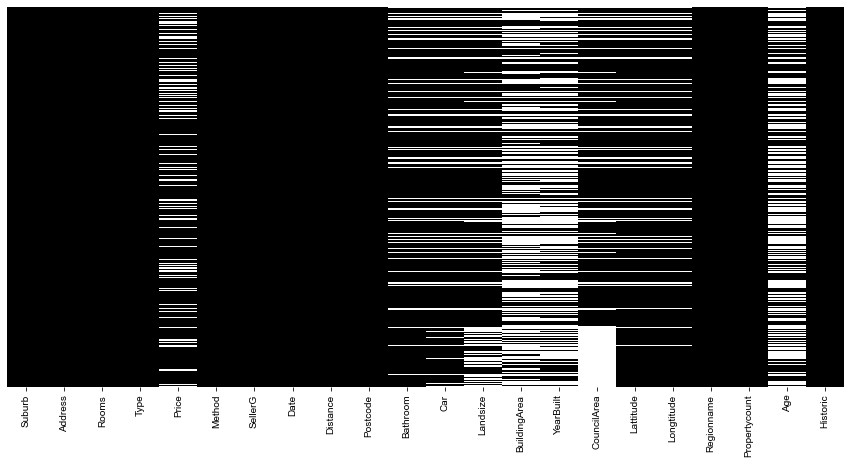

In [16]:
# Visualize missing values
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.2)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r')
plt.show()

In [17]:
# Count of missing values
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             5151
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          4484
Car               4626
Landsize          6137
BuildingArea     13529
YearBuilt        12007
CouncilArea       7891
Lattitude         4304
Longtitude        4304
Regionname           1
Propertycount        1
Age              12007
Historic             0
dtype: int64

In [38]:
#RegionName, Council Area, Property count- two rows which have all of these values as missing. No way to determine the values
df=df[df.Regionname.notnull()]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


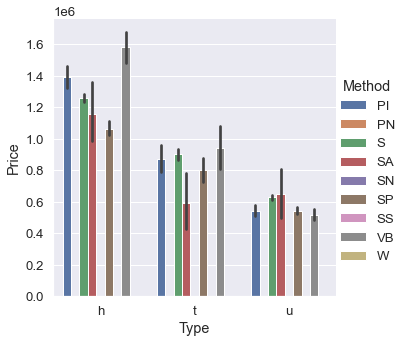

In [39]:
sns.factorplot(x="Type", y="Price", hue="Method", data=df, kind="bar");

There are a significant amount of missing values in Price, Bathroom, Car, Landsize, Building Area, YearBuilt, Council Area, Lattitude, and Longitude. To allow for a more complete analysis, observations missing any data will be removed from the dataset.

__View missing data__

In [34]:
#dataset[dataset['Bedroom2'].isnull()]
#To remove rows missing data in a specific column 
# dataset =dataset[pd.notnull(dataset['Price'])]

# To remove an entire column
# dataset = dataset.drop('Bedroom2',axis = 1)

# Remove rows missing data
df=df.dropna()

# Confirm that observations missing data were removed  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 2 to 19739
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         6196 non-null   category      
 1   Address        6196 non-null   category      
 2   Rooms          6196 non-null   int64         
 3   Type           6196 non-null   category      
 4   Price          6196 non-null   float64       
 5   Method         6196 non-null   category      
 6   SellerG        6196 non-null   category      
 7   Date           6196 non-null   datetime64[ns]
 8   Distance       6196 non-null   float64       
 9   Postcode       6196 non-null   category      
 10  Bathroom       6196 non-null   float64       
 11  Car            6196 non-null   float64       
 12  Landsize       6196 non-null   float64       
 13  BuildingArea   6196 non-null   float64       
 14  YearBuilt      6196 non-null   float64       
 15  CouncilArea    6196 

__OUTLIERS__

The statistical summary revealed minimum values of zero for Landsize and BuildingArea that seem odd. Also, there is a max price of $8.4 million in the dataset. These observations will need to be investigated further to determine their validity and whether they should be included in the dataset for analysis.

In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,23547.0,2.976048e+00,0.974501,1.00000,2.0000,3.0000,4.000000e+00,1.200000e+01
Price,18396.0,1.056697e+06,641921.666710,85000.00000,633000.0000,880000.0000,1.302000e+06,9.000000e+06
Distance,23546.0,1.030651e+01,6.016318,0.00000,6.2000,9.5000,1.300000e+01,4.810000e+01
Bathroom,19063.0,1.570897e+00,0.712684,0.00000,1.0000,1.0000,2.000000e+00,1.200000e+01
Car,18921.0,1.626235e+00,0.974048,0.00000,1.0000,2.0000,2.000000e+00,2.600000e+01
Landsize,17410.0,5.517835e+02,3544.288014,0.00000,181.0000,448.0000,6.560000e+02,4.330140e+05
BuildingArea,10018.0,1.545279e+02,462.535765,0.00000,95.0000,129.0000,1.800000e+02,4.451500e+04
YearBuilt,11540.0,1.964637e+03,37.595504,1196.00000,1940.0000,1970.0000,2.000000e+03,2.106000e+03
Lattitude,19243.0,-3.781243e+01,0.079926,-38.18418,-37.8593,-37.8097,-3.775980e+01,-3.740758e+01
Longtitude,19243.0,1.450003e+02,0.106071,144.43162,144.9393,145.0043,1.450631e+02,1.455264e+02


In [41]:
df[df['Age']>800]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
16424,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,2017-06-24,14.2,3149.0,...,807.0,117.0,1196.0,Monash,-37.86788,145.12121,Eastern Metropolitan,13366.0,821.0,Historic


{'whiskers': [<matplotlib.lines.Line2D at 0x26a5eb13dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x26a5eb25520>,
 'boxes': [<matplotlib.lines.Line2D at 0x26a5eb13a30>],
 'medians': [<matplotlib.lines.Line2D at 0x26a5eb25c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x26a5eb25fd0>],
 'means': []}

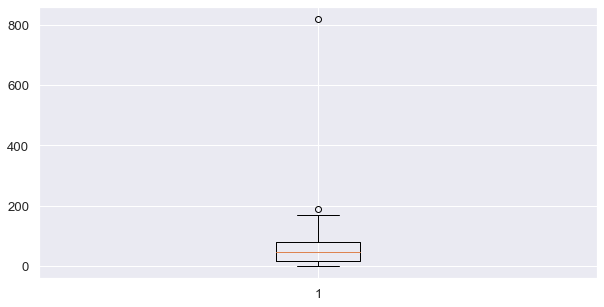

In [42]:
plt.figure(figsize=(10,5))
plt.boxplot(df['Age'])

In [22]:
df[df['BuildingArea']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
7211,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,2017-04-03,2.3,3051.0,...,215.0,0.0,2000.0,Melbourne,-37.79530,144.94370,Northern Metropolitan,6821.0,17.0,Contemporary
19775,Balwyn North,14 Wanbrow Av,5,h,1950000.0,S,RT,2017-03-09,9.7,3104.0,...,743.0,0.0,1949.0,NaN,-37.80235,145.09311,Southern Metropolitan,7809.0,68.0,Historic
19840,Bundoora,22 Moreton Cr,3,h,814000.0,S,Barry,2017-03-09,12.1,3083.0,...,542.0,0.0,1970.0,NaN,-37.70861,145.05691,Northern Metropolitan,10175.0,47.0,Contemporary
20038,Heidelberg Heights,8 Thames St,3,h,NaN,SN,Miles,2017-03-09,8.8,3081.0,...,658.0,0.0,1920.0,NaN,-37.75287,145.05547,Eastern Metropolitan,2947.0,97.0,Historic
20223,Roxburgh Park,16 Sandover Dr,4,h,570000.0,S,Raine,2017-03-09,20.6,3064.0,...,504.0,0.0,2000.0,NaN,-37.61419,144.93448,Northern Metropolitan,5833.0,17.0,Contemporary
20262,Thornbury,19/337 Station St,3,t,900000.0,VB,Jellis,2017-03-09,7.0,3071.0,...,120.0,0.0,2000.0,NaN,-37.76343,145.02096,Northern Metropolitan,8870.0,17.0,Contemporary
20576,Guys Hill,8 Montuna Gr,4,h,NaN,PN,O'Brien,2017-09-09,39.0,3807.0,...,NaN,0.0,2013.0,NaN,-38.01458,145.38619,Eastern Victoria,129.0,4.0,Contemporary
21155,Elwood,6/31 Beach Av,2,u,735000.0,S,Buxton,2017-09-16,7.2,3184.0,...,NaN,0.0,1960.0,NaN,-37.88646,144.98491,Southern Metropolitan,8989.0,57.0,Historic
21510,Roxburgh Park,109 Rossiter Av,3,h,NaN,SN,Barry,2017-09-16,20.6,3064.0,...,647.0,0.0,2000.0,NaN,-37.63211,144.92587,Northern Metropolitan,5833.0,17.0,Contemporary
21561,Sunshine West,5 Comino Rd,5,h,720000.0,S,Bells,2017-09-16,10.5,3020.0,...,NaN,0.0,2010.0,NaN,-37.79324,144.79389,Western Metropolitan,6763.0,7.0,Contemporary


{'whiskers': [<matplotlib.lines.Line2D at 0x26a5f081310>,
 'caps': [<matplotlib.lines.Line2D at 0x26a5f081a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x26a5f073f40>],
 'medians': [<matplotlib.lines.Line2D at 0x26a5f08d190>],
 'fliers': [<matplotlib.lines.Line2D at 0x26a5f08d520>],
 'means': []}

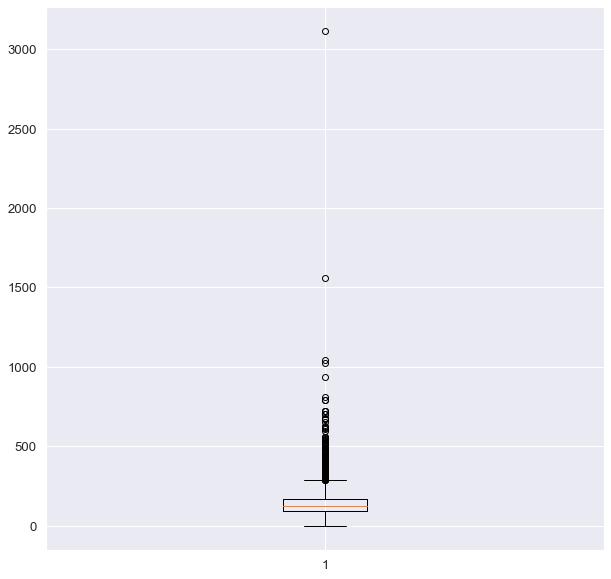

In [43]:
plt.figure(figsize=(10,10))
plt.boxplot(df['BuildingArea'])

{'whiskers': [<matplotlib.lines.Line2D at 0x26a5f0e9220>,
 'caps': [<matplotlib.lines.Line2D at 0x26a5f0e9940>,
 'boxes': [<matplotlib.lines.Line2D at 0x26a5f0dae50>],
 'medians': [<matplotlib.lines.Line2D at 0x26a5f0f40a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26a5f0f4430>],
 'means': []}

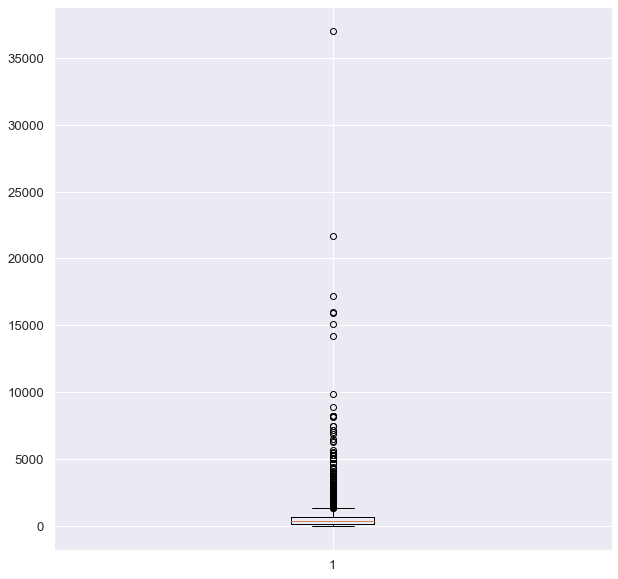

In [44]:
plt.figure(figsize=(10,10))
plt.boxplot(df['Landsize'])

In [45]:
df[df['Landsize']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
25,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,2016-12-11,2.5,3067.0,...,0.0,94.00,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4019.0,8.0,Contemporary
42,Abbotsford,6/219 Nicholson St,2,u,500000.0,S,Collins,2016-06-18,2.5,3067.0,...,0.0,60.00,1970.0,Yarra,-37.80150,144.99720,Northern Metropolitan,4019.0,47.0,Contemporary
57,Abbotsford,11/205 Gipps St,1,u,470000.0,S,Nelson,2016-07-26,2.5,3067.0,...,0.0,50.00,2013.0,Yarra,-37.80550,144.99610,Northern Metropolitan,4019.0,4.0,Contemporary
67,Airport West,50 Bedford St,3,h,730000.0,VB,Nelson,2016-03-12,13.5,3042.0,...,0.0,145.00,1965.0,Moonee Valley,-37.72030,144.87550,Western Metropolitan,3464.0,52.0,Historic
68,Airport West,50 Bedford St,3,h,770000.0,SP,Nelson,2017-04-03,13.5,3042.0,...,0.0,145.00,1965.0,Moonee Valley,-37.72030,144.87550,Western Metropolitan,3464.0,52.0,Historic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19678,South Yarra,9/17 Howitt St,2,u,570000.0,VB,Ray,2017-07-29,2.7,3141.0,...,0.0,64.00,1965.0,Stonnington,-37.84679,145.00206,Southern Metropolitan,14887.0,52.0,Historic
19685,St Kilda,45/151 Fitzroy St,2,u,600000.0,VB,hockingstuart,2017-07-29,5.0,3182.0,...,0.0,82.00,1930.0,Port Phillip,-37.85911,144.97900,Southern Metropolitan,13240.0,87.0,Historic
19710,Tullamarine,9/200 Melrose Dr,2,u,300000.0,SP,Jason,2017-07-29,12.9,3043.0,...,0.0,66.32,1980.0,Hume,-37.69815,144.88019,Western Metropolitan,3296.0,37.0,Contemporary
19734,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,2017-07-29,6.8,3016.0,...,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0,50.0,Historic


In [26]:
# Remove outlier
df = df[df['BuildingArea']!=0]

# Confirm removal
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,23517.0,2.975720e+00,0.974525,1.00000,2.0000,3.0000,4.000000e+00,1.200000e+01
Price,18372.0,1.056452e+06,641616.180270,85000.00000,633000.0000,880000.0000,1.302000e+06,9.000000e+06
Distance,23516.0,1.030518e+01,6.012858,0.00000,6.2000,9.5000,1.300000e+01,4.810000e+01
Bathroom,19033.0,1.570798e+00,0.712763,0.00000,1.0000,1.0000,2.000000e+00,1.200000e+01
Car,18891.0,1.626012e+00,0.973953,0.00000,1.0000,2.0000,2.000000e+00,2.600000e+01
Landsize,17390.0,5.518209e+02,3546.313950,0.00000,181.0000,448.0000,6.560000e+02,4.330140e+05
BuildingArea,9988.0,1.549920e+02,463.152288,0.01000,95.0000,130.0000,1.800000e+02,4.451500e+04
YearBuilt,11510.0,1.964618e+03,37.605669,1196.00000,1940.0000,1970.0000,2.000000e+03,2.106000e+03
Lattitude,19213.0,-3.781246e+01,0.079887,-38.18418,-37.8593,-37.8098,-3.775981e+01,-3.740758e+01
Longtitude,19213.0,1.450002e+02,0.106056,144.43162,144.9393,145.0043,1.450631e+02,1.455264e+02


After additional research, I determined that a zero land size could be indicative of 'zero-lot-line' homes - residential real estate in which the structure comes up to or very near the edge of the property line. Therefore, these observations are valid and will remain the data set.

However, the observation with a 'zero' BuildingArea will be removed because it is not possible for a home to have a size of zero. Also, this observation is priced usually high at $8.4M (the outlier identified earlier), further confirming a possible error in the data point. For these two reasons, this observation will be removed.

# EXPLORATORY ANALYSIS

### UNIVARIATE


The dependent (or target) variable we are trying to predict in this analysis is Price. This variable appears to be normally distributed and skewed to the right. That is, the majority of homes around $900k  with some outliers around $8M.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

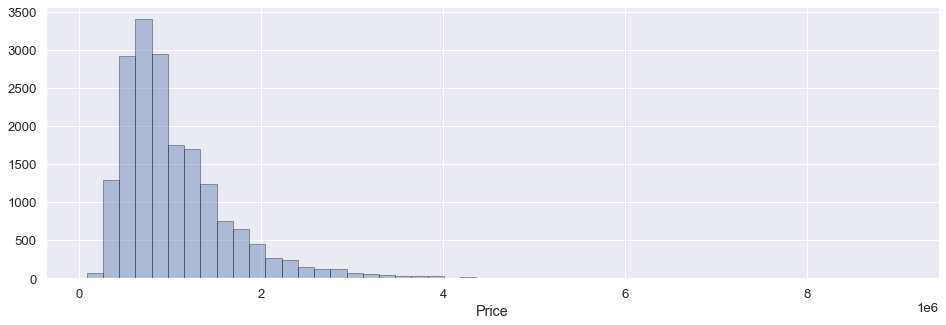

In [29]:
plt.figure(figsize=(16,5))
sns.distplot(df['Price'], kde = False,hist_kws=dict(edgecolor="k"))

### BIVARIATE

***Categorical Feature***

Next, I'll take a look at the relationships between the target variable and the categorical features. Suburb, Address, and Postcode are measures based on location. Rather than using all of these features in the analysis, Regionname would be the best proxy of home location to use for analysis that gets to the heart of this information in a more condensed way.

Based on domain knowledge, a home's real estate agent or council member has a minimal effect on a price relative to other features and will be excluded from further analysis

In [28]:
# Abbreviate Regionname categories
df['Regionname'] = df['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro', 
                                            'Southern Metropolitan':'S Metro', 
                                            'Eastern Metropolitan':'E Metro', 
                                            'South-Eastern Metropolitan':'SE Metro', 
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})

C:\Users\91728\AppData\Local\Temp/ipykernel_26852/1971886980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Regionname'] = df['Regionname'].map({'Northern Metropolitan':'N Metro',


### Suplots of categorical features v price

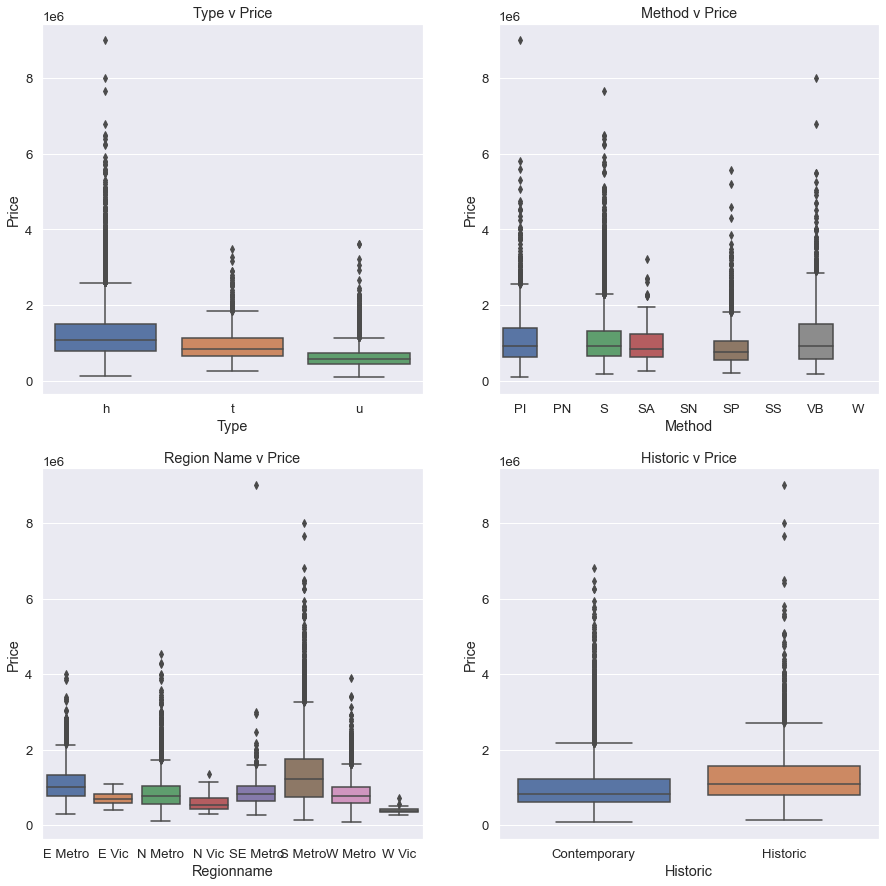

In [29]:

sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = df, x = 'Type', y = 'Price', ax = axes[0,0])
axes[0,0].set_xlabel('Type')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Type v Price')
# Plot [0,1]
sns.boxplot(x = 'Method', y = 'Price', data = df, ax = axes[0,1])
axes[0,1].set_xlabel('Method')
#axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Method v Price')

# Plot [1,0]
sns.boxplot(x = 'Regionname', y = 'Price', data = df, ax = axes[1,0])
axes[1,0].set_xlabel('Regionname')
#axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Region Name v Price')
# Plot [1,1]
sns.boxplot(x = 'Historic', y = 'Price', data = df, ax = axes[1,1])
axes[1,1].set_xlabel('Historic')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Historic v Price')

plt.show()

### Insights

1.Median prices for houses are over $1M, townhomes are $800k - $900k   and units are approx $500k.

2.Home prices with different selling methods are relatively the same across the board.

3.Median prices in the Metropolitan Region are higher than than that of Victoria Region - with Southern Metro being the area with the highest median home price (~$1.3M).

4.With an average price of $1M, historic homes (older than 50 years old) are valued much higher than newer homes in the area, but have more variation in price.

### Numeric Feature 

Next, I visualize the relationships between numeric features in the dataset and price.

In [30]:
# Identify numeric features
df.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

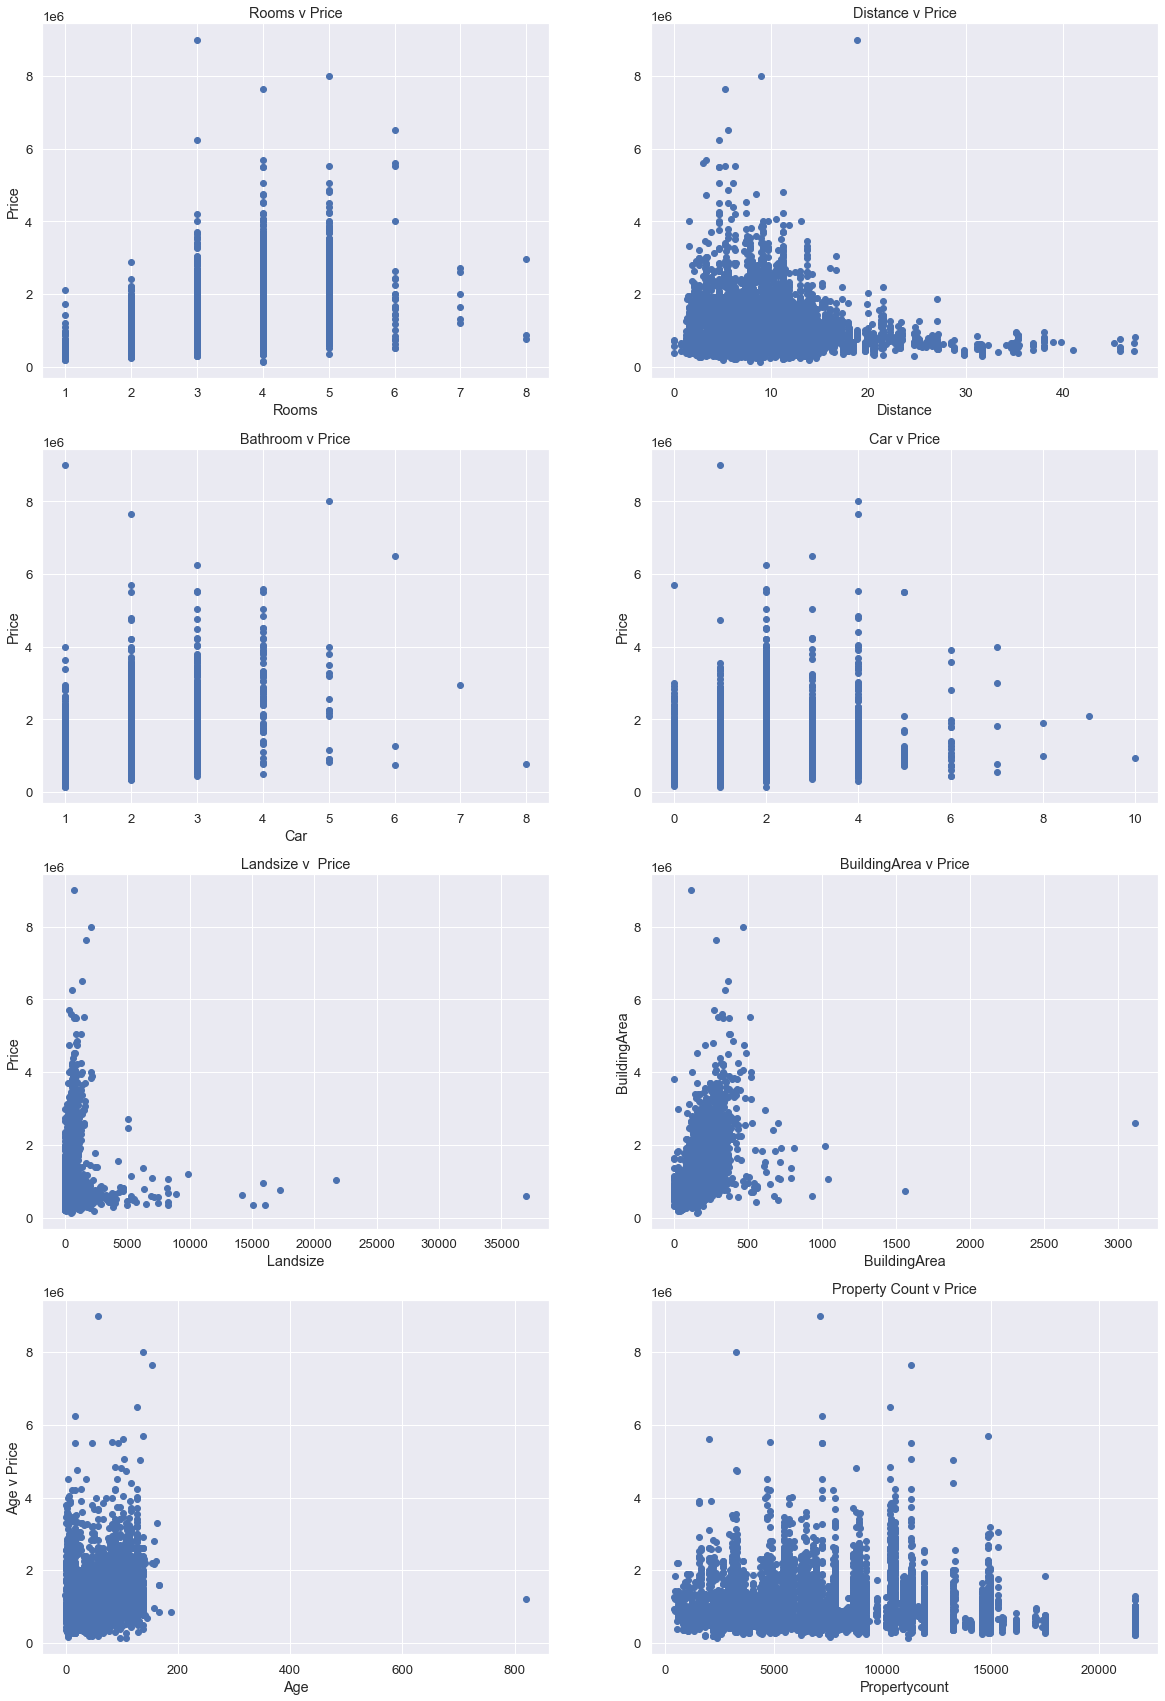

In [47]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30
    ))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = df, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = df, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')
# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = df, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = df, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')
# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = df, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = df, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')
# Plot [3,0]
axes[3,0].scatter(x = 'Age', y = 'Price', data = df, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('Age v Price')

# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = df, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count v Price')

plt.show()


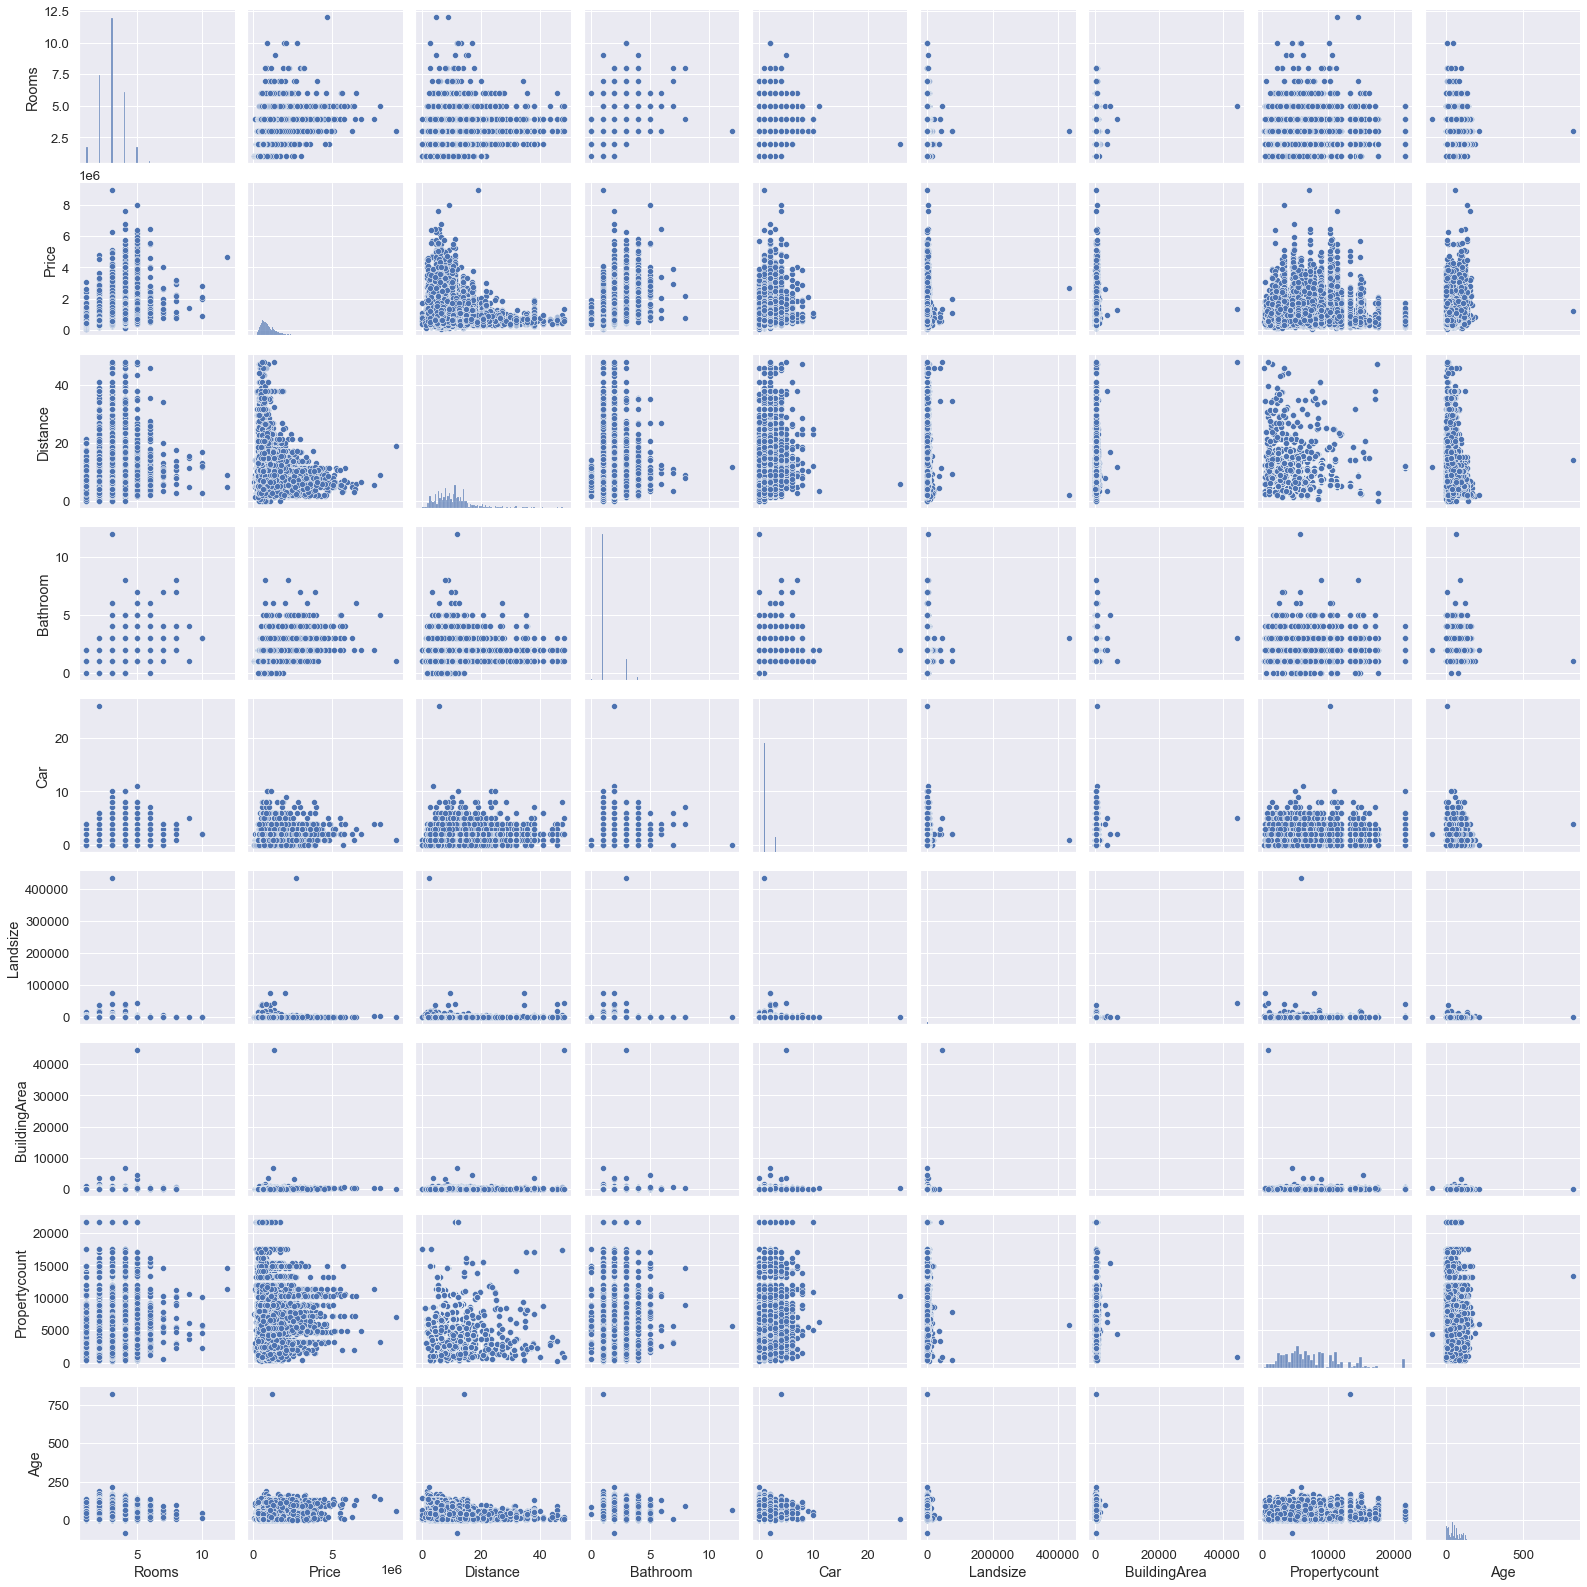

In [32]:
# Pairplot
sns.pairplot(df,vars= ['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize','BuildingArea',  'Propertycount','Age'], palette = 'viridis')
plt.show()

### Insights

The majority of homes in the dataset have 4 or 5 rooms.

The most prominent trend is that there is a negative correlation between Distance from Melbourne's Central Business District (CBD) and Price. 

The most expensive homes ($2M or more) tend to be within 20km of the CBD.

In [ ]:
#most expensive to the least expensive areas
data_priced.plot(kind="scatter", x="Longtitude", y="Lattitude", c = "Price", alpha=0.2, colorbar=True, sharex=False, cmap=plt.get_cmap("viridis"))
plt.title('Fig 4')
plt.show()
#plt.savefig('map1.png')

In [73]:
data_priced = df[df.Price.notnull()]

# Clubing features together - Location

### Most expensive to the least expensive areas

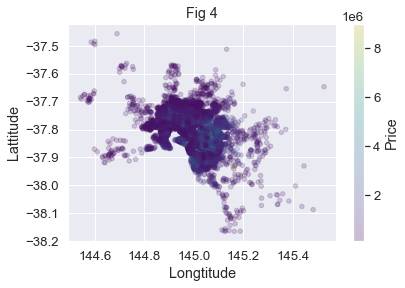

In [74]:
data_priced.plot(kind="scatter", x="Longtitude", y="Lattitude", c = "Price", alpha=0.2, colorbar=True, sharex=False, cmap=plt.get_cmap("viridis"))
plt.title('Fig 4')
plt.show()
#plt.savefig('map1.png')

## Statistical analysis 

<AxesSubplot:title={'center':'Number of Houses per Governing Council of Area'}>

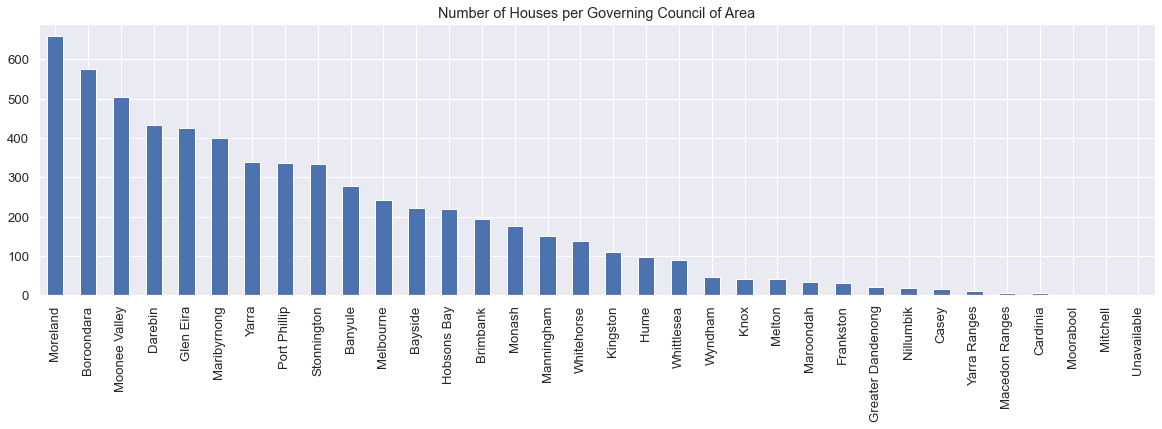

In [24]:
## Council Wise Number of Houses
CouncilArea = df['CouncilArea'].value_counts()

CouncilArea.plot.bar(figsize =(20, 5), title = "Number of Houses per Governing Council of Area")

In [38]:
# lets make a new column which has price per square meter area
## Price per Sq . meter of suburb

price = pd.DataFrame(df)

price['P/sqmtr'] = price['Price'] // price['BuildingArea']


price.replace([np.inf, -np.inf], np.nan, inplace=True) 
  
# Dropping all the rows with nan values 
price.dropna(inplace=True) 

<AxesSubplot:title={'center':'Number of Houses per Region'}>

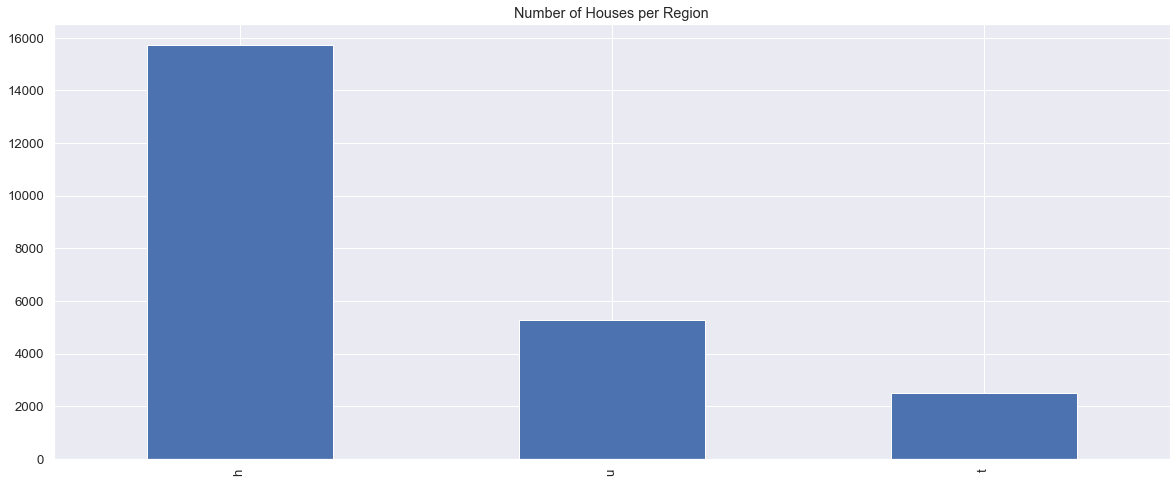

In [39]:
types = df['Type'].value_counts()

types.plot.bar(figsize =(20, 8), title = "Number of Houses per Region")

<AxesSubplot:title={'center':'Top 10 Suburbs with Highest Average Price / Sq.Meter'}, xlabel='Suburb'>

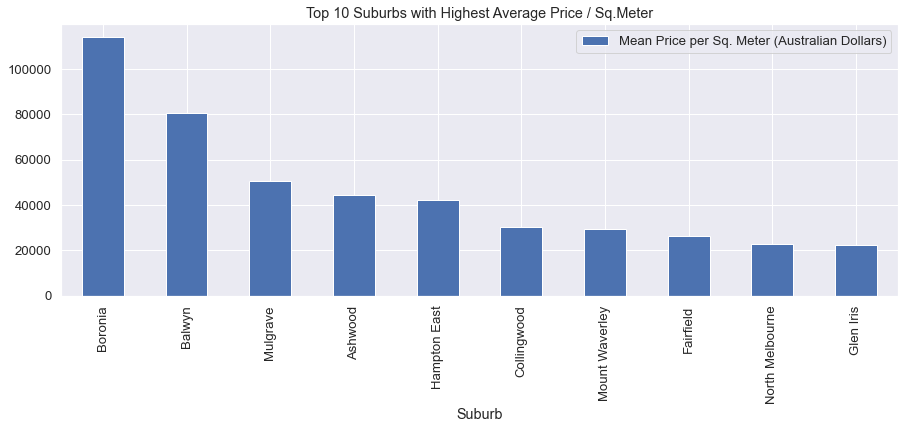

In [40]:
sp = pd.DataFrame(price[['Suburb', 'P/sqmtr']].groupby(['Suburb']).agg(['mean']))

sp.columns=['Mean Price per Sq. Meter (Australian Dollars)']
sp = sp.nlargest(10, ['Mean Price per Sq. Meter (Australian Dollars)']) 
sp.plot.bar(figsize = (15,5), title = "Top 10 Suburbs with Highest Average Price / Sq.Meter")

In [41]:
df['Price'].mean()

1056451.8011648161

In [42]:
price = pd.DataFrame(df)

price['P/sqmtr'] = price['Price'] // price['BuildingArea']


price.replace([np.inf, -np.inf], np.nan, inplace=True) 
  
# Dropping all the rows with nan values 
price.dropna(inplace=True)

<AxesSubplot:title={'center':'Top 10 Suburbs with Lowest Average Price / Sq.Meter'}, xlabel='Suburb'>

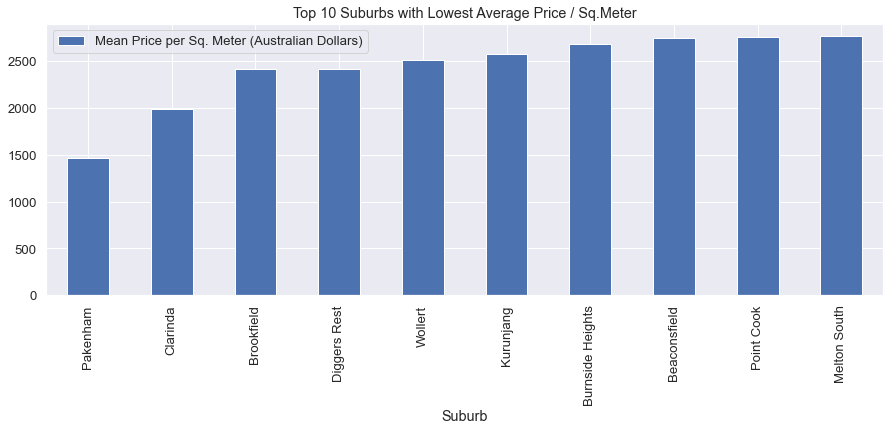

In [44]:
sp1 = pd.DataFrame(price[['Suburb', 'P/sqmtr']].groupby(['Suburb']).agg(['mean']))

sp1.columns=['Mean Price per Sq. Meter (Australian Dollars)']
sp1 = sp1.nsmallest(10, ['Mean Price per Sq. Meter (Australian Dollars)']) 
sp1.plot.bar(figsize = (15,5), title = "Top 10 Suburbs with Lowest Average Price / Sq.Meter")

In [ ]:
## Year built vs price
sp3 = pd.DataFrame(price[['YearBuilt', 'Price']].groupby(['YearBuilt']).agg(['mean']))
sp3.plot.line(figsize =(15, 10), title = "Average Price of a House according to the Year Built")
plt.xlim([1800, 2018])

(1800.0, 2018.0)

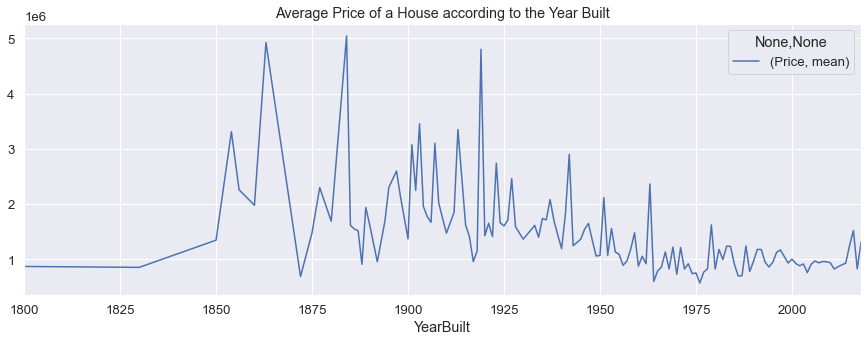

In [55]:
## Year built vs price
sp3 = pd.DataFrame(price[['YearBuilt', 'Price']].groupby(['YearBuilt']).agg(['mean']))
sp3.plot.line(figsize =(15, 5), title = "Average Price of a House according to the Year Built")
plt.xlim([1800, 2018])

# Hypothesis Testing

###### In this study, I will try to do basic hypothesis testing for Abbotsford district of Melbourne.

**Null hypothesis**: house prices in Abbotsford-Melbourne are more expensive than in Melbourne general

**Alternative Hypothesis**: house prices in Abbotsford-Melbourne are not more expensive than in Melbourne

We have chosen the Abbotsford Subsurb of Melbourne to test. We will basically look if the house prices are more expensive in Abbotsford than in Melbourne general. You can freely pick any other suburb or region to test.

In [46]:
df_without_null_prices = df[~df["Price"].isnull()]
prices = df_without_null_prices["Price"]
prices

1        1480000.0
2        1035000.0
4        1465000.0
5         850000.0
6        1600000.0
           ...    
23540     622500.0
23541    2500000.0
23544    1100000.0
23545    1285000.0
23546    1050000.0
Name: Price, Length: 18372, dtype: float64

In [47]:
in_abbotsford = df_without_null_prices.loc[df["Suburb"] == "Abbotsford"]
prices_in_abbotsford = in_abbotsford["Price"]
prices_in_abbotsford

1        1480000.0
2        1035000.0
4        1465000.0
5         850000.0
6        1600000.0
           ...    
21637    1001000.0
22158     415000.0
22159     683000.0
22161    1255000.0
22900    1200000.0
Name: Price, Length: 82, dtype: float64

In [48]:
prices_in_abbotsford_mean = prices_in_abbotsford.mean()
prices_in_abbotsford_mean

1026500.0

In [49]:
prices_mean = prices.mean()
prices_mean

1056451.8011648161

In [50]:
prices_in_abbotsford_std = prices_in_abbotsford.std()
prices_in_abbotsford_std

388159.23612944287

In [51]:
prices_std = prices.std()
prices_std

641616.1802704599

In [52]:
prices_in_abbotsford_len = len(prices_in_abbotsford)
prices_in_abbotsford_len
prices_len = len(prices)
prices_len

18372

In [53]:
min_price = prices.min()
max_price = prices.max()
min_abbotsford_price = prices_in_abbotsford.min()
max_abbotsford_price = prices_in_abbotsford.max()

In [56]:
from numpy import sqrt, abs, round
from scipy.stats import norm, uniform, zscore

In [57]:
standard_error = prices_std / sqrt(prices_in_abbotsford_len)
standard_error

70854.65394158072

As the hypothesis are declared, it’s known that Abbotsford is a district of Melbourne. First the population mean and standard deviation and the sample (Abbotrsford) mean and population has been calculated.

1.Melbourne house prices mean: 997,898

2.Melbourne house prices standard deviation: 593,498

3.Abbotsford house prices mean: 1,040,200

4.Abbotsford house prices standard deviation: 374,652

After that it’s found how Abbotsford mean is diversed against the total population in manner of standard error units. The calculation result was:

**se units: 0.84, p value: 0.39**

In [59]:
mean_diff = prices_in_abbotsford_mean - prices_mean

In [60]:
standard_errors_away = mean_diff / standard_error
standard_errors_away

-0.42272171972657197

In [61]:
p_value = 2 * (1-norm.cdf(abs(standard_errors_away)))
p_value

0.6724983068999539

In [62]:
mu = prices_mean
sigma = prices_std / sqrt(prices_in_abbotsford_len)

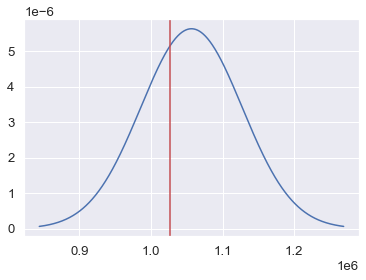

In [63]:
#sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, len(prices))
plt.plot(x, norm.pdf(x, mu, sigma))
plt.axvline(x=prices_in_abbotsford_mean, color="r")
plt.show()

In [64]:
sigma

70854.65394158072

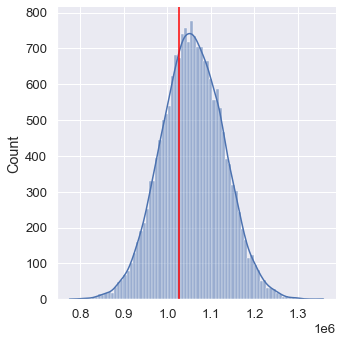

In [65]:
value = np.random.normal(loc=prices_mean,scale=sigma,size=len(prices))
sns.displot(value, kde=True)
plt.axvline(prices_in_abbotsford_mean, color='red') # Plot a vertical line at corresponding x

So the mean of Abbotsford house prices were 0.84 standard error units higher than the mean of the population. I preferred to synchronize to the general convention for se level of 1.645 and p value level of 0.05. Since our scores of se 0.84 < 1.645 and p value of 0.39 > 0.05, so the hypothesis of house prices in Abbotsford-Melbourne are more expensive than in Melbourne general is rejected. We can assume the houses in Abbotsford are not much more expensive than the total population, which is, Melbourne. Since standard error unit is found 49,805 (dollars), and Abbotsford house price mean is 0.84 standard error units away, 49,805 (dollars) * 0,84 = 41.836 (dollars). So that means Abbotsford mean house price is 41.836 away from the mean of Melbourne house price.

We can see the result graphs above. This is not the standardized normal distribution, so this needed to be explained. In the plotted graphs, 1.0 means 1.0 trillion dollars, and 1.1 is also 1.1 trillion dollars and from the red line which represents Abbotsford mean house prices, we can clearly see on the plot that it is deviated 41.836 (dollars).

# CORRELATION
Next, I explore how all the variables are correlated with one another.

Text(0.5, 1.0, 'Variable Correlation')

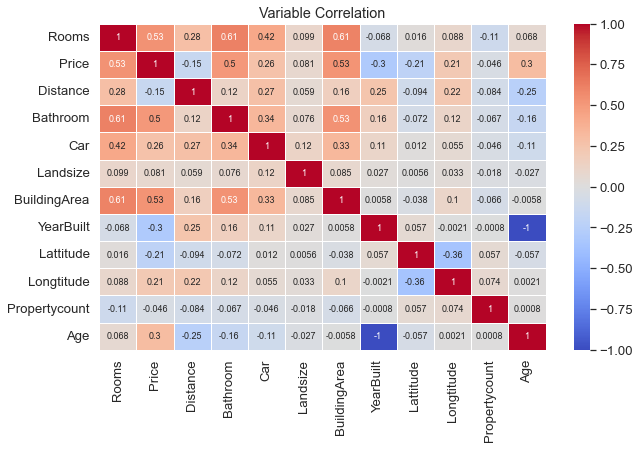

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

#### Weak Positive Correlation
Age and Price




### Moderate Positive Correlation
Rooms and Price

Bathrooms and Price

Building Area and Price

The Rooms, Bathroom, and BuildingArea features are also moderately correlated with one another as they are all measures of home size.

# LINEAR PRGRESSION

In [41]:
# Identify numeric features
df.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

In [42]:
# Split
# Create features variable 
X =df[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'Propertycount','Age']]

# Create target variable
y = df['Price']

# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [43]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train,y_train)

LinearRegression()

In [44]:
# Predict
# Predicting test set results
y_pred = regressor.predict(X_test)

### Regression Evaluation Metrics
Three common evaluation metrics for regresson problems:

Mean Absolute Error (MAE)

Mean Squared Error (MSE)

Root Mean Squared Error (RMSE)

All basic variations on the difference between what you predicted and the true values.


Comparing these metrics:

***MAE*** is the easiest to understand, because it's the average error.

***MSE*** more popular than MAE, because MSE "punishes" larger errors, tends to be useful in the real world.

***RMSE*** is even more popular than MSE, because RMSE is interpretable in the "y" units (target units) .

All of these are loss functions, because we want to minimize them

In [45]:
# Score It
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 306047.83569323056
MSE: 307374494292.8771
RMSE: 554413.6490860205


___RMSE___ tells us explicitly how much our predictions deviate, on average, from the actual values in the dataset. In this case, our predicted values are $508,212.42 away from the actual value.

In [46]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.44061253471085815


According to the R-squared, 47.6% of the variance in the dependent variable is explained by the model.

### Analyze the Residuals

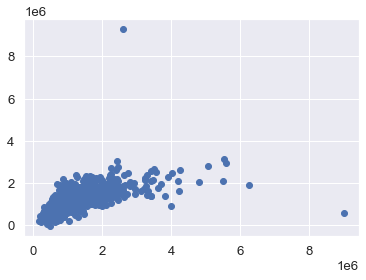

In [47]:
# Actual v predictions scatter
plt.scatter(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

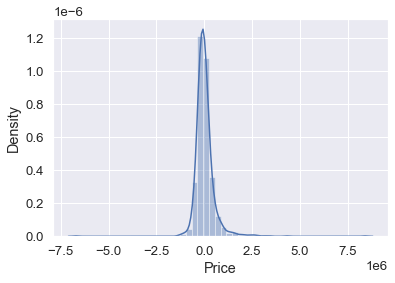

In [48]:
# Histogram of the distribution of residuals
sns.distplot((y_test - y_pred))

### Interpreting the Cofficients

In [49]:
cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Rooms,124463.861006
Distance,-29003.999748
Bathroom,240399.953015
Car,57344.174977
Landsize,15.472533
BuildingArea,2513.857630
Propertycount,-0.246215
Age,4940.051642


# CONCLUSION 

Every one unit increase in:

__Rooms__ is associated with an increase in Price by $136,531.55

__Distance__ is associated with a decrease in Price by $32,160.84

__Bathroom__ is associated with an increase in Price by $236,639.21

__Car__ space is associated with an increase in Price by $59,122.83

__Landsize__ is associated with an increase in Price by $35.75

__BuildingArea__ is associated with an increase in Price by $26,65.10

__Propertycount__ is associated with a decrease in Price by $0.05

__Age__ is associated with an increase in Price by $4,729.73